# Matplotlib MatLab-style scientific visualization

Matplotlib is currently the most popular scientific visualization packages in Python.
Even proponents admit that its interface is sometimes overly verbose, but it is a powerful library for creating a large range of plots.

To use Matplotlib, we can start by enabling the notebook mode (for use in the Jupyter notebook) and then importing the package as ``plt``.

To start with, lets import the data

In [1]:
import pandas as pd

df = pd.read_csv('Data/airlineDT.csv', sep=',')
df.head(5)

,YEAR,MONTH,DAY,DEP_TIME,SCHED_DEP_TIME,DEP_DELAY,ARR_TIME,SCHED_ARR_TIME,ARR_DELAY,CARRIER,FLIGHT,TAILNUM,ORIGIN,DEST,AIR_TIME,DISTANCE,HOUR,MINUTE,TIME_HOUR
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,623.0,627,-4.0,933.0,932,1.0,UA,496,N459UA,LGA,IAH,229.0,1416,6,27,2013-01-01T11:00:00Z
3,2013,1,1,728.0,732,-4.0,1041.0,1038,3.0,UA,473,N488UA,LGA,IAH,238.0,1416,7,32,2013-01-01T12:00:00Z
4,2013,1,1,739.0,739,0.0,1104.0,1038,26.0,UA,1479,N37408,EWR,IAH,249.0,1400,7,39,2013-01-01T12:00:00Z


## Basics

In [3]:
# run this if using Jupyter notebook #matplotlib notebook
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

In [4]:
import matplotlib.pyplot as plt

If you run this code live, you will see an interactive plot that lets you pan, zoom, and scroll to explore the data.

This is the simplest example of a Matplotlib plot; for ideas on the wide range of plot types available, see [Matplotlib's online gallery](http://matplotlib.org/gallery.html)

Lets take a look how a default style looks with more labels (Default style - 'classic')

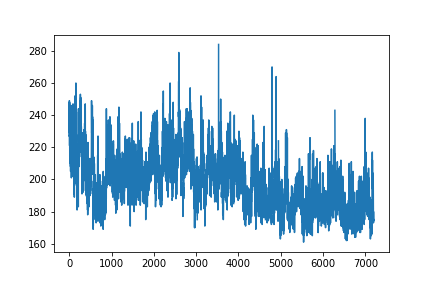

In [5]:
plt.plot(df['AIR_TIME'])
plt.show()

Obviously it is not clear about this graph, what are values, 'the big picture'. We want to add more labels, legends where we can create easily by ourselves. As well we want to include some datetime in out x axis.

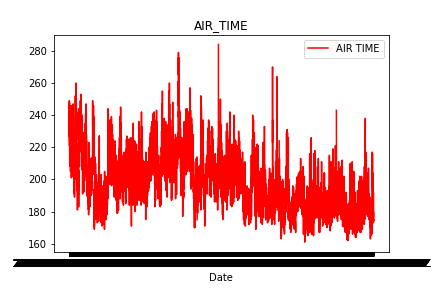

In [6]:
plt.plot(df['TIME_HOUR'], df['AIR_TIME'], color="red", label="AIR TIME")

plt.xlabel('Date')

plt.title("AIR_TIME")
plt.legend()
plt.show()

Datetime can be given not completely as time series, so we want to sort our dataframe by time, to make sure our time series are correct.

In [7]:
df = df.sort_values(by=['TIME_HOUR'])

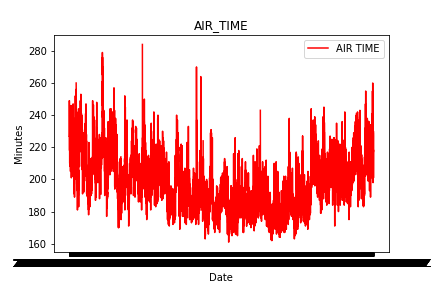

In [8]:
plt.plot(df['TIME_HOUR'], df['AIR_TIME'], color="red", label="AIR TIME")

plt.ylabel('Minutes')
plt.xlabel('Date')

plt.title("AIR_TIME")
plt.legend()
plt.show()

Clearly, it solved the problem.

As you can see, we created a customized graph. Important to mention that matplotlib support different type of graph.

Now lets take a look at string values, where we want to see histogram of it. Moreover, we can include a value of other axis in out graph and to count how many are of these groups. To start with, we want to extract frequency of each unique value.

In [9]:
df['ORIGIN'].value_counts()

EWR    3973
LGA    2951
JFK     274
Name: ORIGIN, dtype: int64

Since we focus on Pandas, we can call a graph straight out of the modified dataset by frequency of each unique value. Inside the **plot()** function we can define what **kind** of graph we want.

In [ ]:
import numpy as np

df['ORIGIN'].value_counts().plot(kind='bar')

plt.ylabel('Count')
plt.xlabel('Group')

plt.title("AIR_TIME")
plt.legend()
plt.show()

Clearly matplotlib supports a lot of customization in order to be able to express the ideas as clearly as possible. You can customize data points as you want and include any type of datapoints

The last thing which is important to take into account is to combine multiple graphs in the same. As an example,

In [ ]:
plt.plot(df['TIME_HOUR'], df['AIR_TIME'], color="red", label="AIR TIME")
plt.plot(df['TIME_HOUR'], df['DEP_DELAY'], color="green", label="DEP DELAY")

plt.ylabel('Time')
plt.xlabel('Date')

plt.title("AIR_TIME")
plt.legend()
plt.show()

It can look not very clearly to compare two time series, so we want to add secondary axis

In [ ]:
fig,ax = plt.subplots()
# make a plot
ax.plot(df['TIME_HOUR'], df['AIR_TIME'], color="red", label="AIR TIME")
ax.set_xlabel("year")
ax.set_ylabel("AIR_TIME minutes",color="red")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(df['TIME_HOUR'], df['DEP_DELAY'], color="green", label="DEP DELAY")
ax2.set_ylabel("DEP_DELAY minutes",color="green")
plt.show()
# save the plot as a file

## Subplots

Another similar case to secondary axis to have a two separate plots next to each other. Here you will see how to display multiple plots in a single figure using the subplot function. First, you need to define how many subplots will be. Assuming we will do with 2 subplots in 1 figure.

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('2 plots in 1 figure')
axs[0].plot(df['TIME_HOUR'], df['AIR_TIME'], color="red")
df['ORIGIN'].value_counts().plot(kind='bar',ax=axs[1])
fig.show()

You can see that we called differently both sublots:
- **axs[0].plot(df['TIME_HOUR'], df['AIR_TIME'], color="red")**: the reason is that we give a specific datasets inside the plot() function

- **df['ORIGIN'].value_counts().plot(kind='bar', ax=axs[1])**:  here we call a graph straight out of the pandas dataframe, that is why we defindind sublot position inside the plot() function. If we want to do in the same way as in the first option, we should need to separate df['ORIGIN'].value_counts() into two separate series and give inside the plot() function.

## Style Sheets

There is a big list of which u can use what kind of style graph can use.

In [ ]:
for style in plt.style.available:
    print(style)

Lets explore how the style will change by applying ggplot which R's style graph.

In [ ]:
plt.style.use('ggplot')  # make graphs in the style of R's ggplot

In [ ]:
plt.plot(df['TIME_HOUR'], df['AIR_TIME'], color="red", label="AIR TIME")

plt.ylabel('Minutes')
plt.xlabel('Date')

plt.title("AIR_TIME")
plt.legend()
plt.show()

## Boxplot

Frist lets take a look at boxplots. We want to explore about arrive delays, how data is distributed to spot outliers.

In [ ]:
plt.style.use('default')

In [ ]:
df['ARR_DELAY'][df['ARR_DELAY'].isna()]

In [ ]:
plt.boxplot(df['ARR_DELAY'])
plt.title("Boxplot of arrive delay")
plt.show()

The boxplot is empty. One of the common reason can be that data is missing some values, so matplotlib can struggle to identify how treat missing data for specific style of graphs. We want to remove the missing values to be able to plot boxplot.

In [ ]:
df.dropna(inplace=True)

In [ ]:
plt.boxplot(df['ARR_DELAY'])
plt.title("Boxplot of arrive delay")
plt.show()

## Histogram

Now we want to explore how data is distributed by shedule arrive time.

In [ ]:
plt.hist(df['AIR_TIME'], label="Arrive time")
plt.title("Histograms of departure and arrive times")

plt.ylabel('Frequency')
plt.xlabel('Minutes')

plt.legend()
plt.show()

## Scatter Matrix

The last graph which is useful for a quick look up for a data is scatter matrix. Matplotlib doesn't usually contain plotting functions that operate on more than one axes object (subplot, in this case). To overcome given issue, pandas support a full support for scatter matrix from itself. Moreover, we want to get rid of variables in which we are not interested, since scatter matrix could look to much messy.

In [ ]:
df_plot = df[['DEP_TIME','SCHED_DEP_TIME','DEP_DELAY','ARR_TIME', 'TAILNUM']]
pd.plotting.scatter_matrix(df_plot)
plt.show()